<h1>predictive analysis

<h2>scaling and <h/2>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer #import SimpleImputer

In [14]:
df=pd.read_csv("titanic-tested (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
selected_columns=["Survived","Pclass","Gender","Age","SibSp","Parch","Embarked"]

In [16]:
#separate features and label
x=df.drop("Survived",axis=1)
y=df["Survived"]
x

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#one-Hot encode categorical features
categorical_features=["Pclass","Gender","Age","SibSp","Parch","Embarked"]
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")

In [6]:
#1. fit the encoder on the categorical features 
encoded_data=encoder.fit_transform(df[categorical_features])
#2.get th enew feature names (optional)
feature_names=encoder.get_feature_names_out(categorical_features)
#3.create a new dataframe with the encoded data and feature names
encoded_df=pd.DataFrame(encoded_data,columns=feature_names)

In [7]:
#now wscale the numeric age column
#handle missing values in age before scaling
missing_values_age=x["Age"].isna().any()
if missing_values_age:
    print("warning : missing values found in age feature using imputation (mean).")
    imputer=SimpleImputer(strategy="mean")#replace with mean (or other strategy)
    imputer.fit(x[["Age"]])
    x["Age"]=imputer.transform(x[["Age"]])[:,0]  #apply imputation to age

In [8]:
#standard scale the age feature (after imputation)
scaler=StandardScaler()
scaler.fit(x[["Age"]])
x_scaled=x.copy() #create a copy to avoid modifying original data
x_scaled

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [9]:
x_scaled.loc[:,"Age"]=scaler.transform(x[["Age"]])
x_scaled


,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.334993,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.325530,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,2.514175,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,-0.259330,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.655545,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.000000,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.691586,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.651965,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,0.000000,0,0,359309,8.0500,NaN,S


In [10]:
#append th escaled age to the original encoded_df dataframe 
df_merged=pd.concat([encoded_df,x_scaled["Age"]],axis=1)
df_merged


,Pclass_1,Pclass_2,Pclass_3,Gender_female,Gender_male,Age_0.17,Age_0.33,Age_0.75,Age_0.83,Age_0.92,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S,Age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.334993
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.325530
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.514175
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.259330
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.655545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
414,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.691586
415,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.651965
416,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


<h1>Assignment 18<h/1>

In [ ]:
"""
Perform One Hot Encoding and Standard Scaling on the tips dataset. (Hint: Think - Which columns would you consider for this?)

"""

In [17]:
df=pd.read_csv("tips.csv")

In [18]:
df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


In [19]:
selected_col=['total_bill',"tip",'gender',"smoker","day",'time',"size","price_pre_person"]

In [21]:
#separate features and label


x=df.drop("tip",axis=1)
y=df["tip"]

In [28]:
#one-Hot encode categorical features
categorical_features=['gender',"smoker","day",'time',"size"]
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")

In [29]:
#1. fit the encoder on the categorical features 
encoded_data=encoder.fit_transform(df[categorical_features])
#2.get th enew feature names (optional)
feature_names=encoder.get_feature_names_out(categorical_features)
#3.create a new dataframe with the encoded data and feature names
encoded_df=pd.DataFrame(encoded_data,columns=feature_names)
encoded_df


,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:

#now wscale th enumeric total_bill	column
#handle missing values in total_bill column
missing_values_total_bill=x["total_bill"].isna().any()
if missing_values_total_bill:
    print("warning :missing values found in total bill feature using imputation (mean)")
    imputer=SampleImputer(strategy="mean")  #replace with mean (or other strategy)
    imputer.fit(x[["total_bill"]])
    x["total_bill"]=imputer.transform(x[["total_bill"]])[:0] #apply imputtation to total_bill


In [32]:
#standard scale the age feature (after imputation)
scaler=StandardScaler()
scaler.fit(x[["total_bill"]])
x_scaled=x.copy()  #create a copy to  avoid modifying original data
x_scaled

,total_bill,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,17.82,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


In [34]:
x_scaled.loc[:,"total_bill"]=scaler.transform(x[["total_bill"]])
x_scaled

,total_bill,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,-0.314711,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,-1.063235,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,0.137780,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,0.438315,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,0.540745,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...
239,1.040511,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,0.832275,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,0.324630,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,-0.221287,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


In [35]:
#append the escaled age to the original encoded_df dataframe
df_merged=pd.concat([encoded_df,x_scaled["total_bill"]],axis=1)
df_merged

,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.314711
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.063235
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.137780
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.438315
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.540745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.040511
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.832275
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.324630
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.221287


<h1>simple linear Regression<h/1>
<h3>predict salary based on experience<h/3> 

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv("salary.csv")

In [38]:
#for X (independent variable ),tale all the columns from the file , except salary 
x=df.drop("Salary",axis=1).values #drop salary and convert to Numpy array
#numpy arrays are faster to process by scikitlearn, hence .values


In [40]:

#for dependent variable, take only salary
y=df["Salary"]


In [41]:
#step 2: split data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0) #random state =0 means results are reproducable it will not change when running again


In [55]:
#step3: fit simple linear regresion to training data
from sklearn.linear_model import LinearRegression 
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [43]:
#step4: make prediction
y_pred=regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

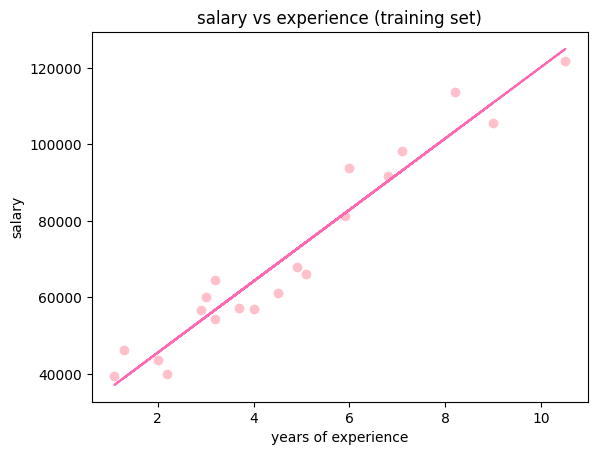

In [45]:
#step5: visualixe training set results 
import matplotlib.pyplot as plt
#plot the actual data points of training set
plt.scatter(x_train,y_train,color="pink")
#plot the regression line
plt.plot(x_train,regressor.predict(x_train),color="hotpink")
plt.title("salary vs experience (training set)")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

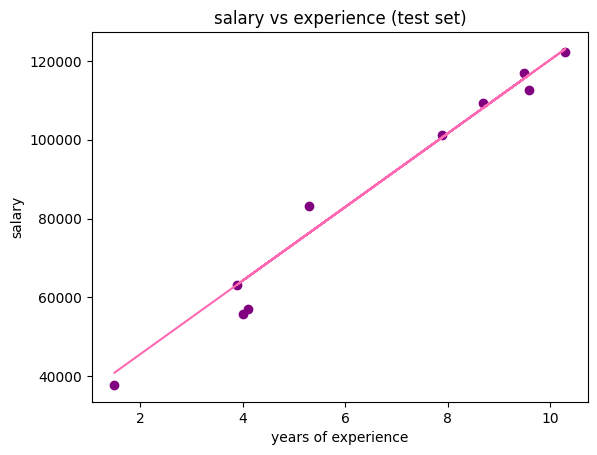

In [56]:
#step 6: visualixe test set sresults 

import matplotlib.pyplot as plt
#plot the actual data points of test set
plt.scatter(x_test,y_test,color="purple")
#plot the regression line for test set
plt.plot(x_test,regressor.predict(x_test),color="hotpink")
plt.title("salary vs experience (test set)")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

In [57]:
#step 7: make new prediction
new_salary_pred=regressor.predict([[15]])
print("the pridicted salary of a perason with 15 years experience is",new_salary_pred)

the pridicted salary of a perason with 15 years experience is [167005.32889087]


In [58]:
#step 8: intercept and coefficient
print("intercept ... fresher salary :",regressor.intercept_)
print("coefficient ... additional salary for each additional years experience: ",regressor.coef_)

intercept ... fresher salary : 26816.192244031183
coefficient ... additional salary for each additional years experience:  [9345.94244312]


In [59]:
#evaluate results 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae=mean_absolute_error(y_test,y_pred)  #
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [60]:
print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"RMSE={rmse}")

MAE=3426.4269374307078
MSE=21026037.329511296
RMSE=4585.4157204675885


<h1>assignment 19<h/1>

""" Perform Simple Linear Regression on the Housing.csv dataset. Use area to predict price. Also add the R2 interpretation. 
"""

In [135]:
df=pd.read_csv("Housing.csv")

df2=df[["price","area"]]

In [136]:
#for X (independent variable ),take all the columns from the file , except price
x=df2.drop("price",axis=1).values #drop price and convert to Numpy array
#numpy arrays are faster to process by scikitlearn, hence .values


In [137]:
#for dependent variable, take only price
y=df["price"]


In [166]:

#step2:split data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0) 


In [167]:

#test 3: fit simple linear regression to training data
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [168]:
#step4: make prediction
y_pred=regressor.predict(x_test)
y_pred

array([4230842.0750479 , 6887887.85284962, 3975538.74408474,
       8580454.38034609, 4070095.53333036, 5341884.34868385,
       4159924.48311369, 3984994.4230093 , 4000123.5092886 ,
       6594761.80618822, 5176409.96750403, 4211930.71719878,
       3970810.90462246, 5204777.00427771, 5169318.20831061,
       3488571.27946984, 4656347.62665316, 5185865.64642859,
       3805336.52344264, 4467234.04816193, 6192895.45189437,
       5389162.74330666, 4703626.02127596, 3143438.99872335,
       5374979.22491981, 3828975.72075404, 5649193.91373209,
       5025119.10471105, 3899893.31268825, 5374979.22491981,
       4419955.65353912, 3415289.76780449, 6311091.43845138,
       4249753.43289702, 3814792.2023672 , 5384434.90384438,
       5176409.96750403, 3775078.35088404, 3970810.90462246,
       3368011.37318168, 6358369.83307419, 5129131.57288122,
       5081853.17825841, 4937654.07465885, 4003905.78085843,
       5176409.96750403, 4306487.50644439, 4249753.43289702,
       4252590.13657439,

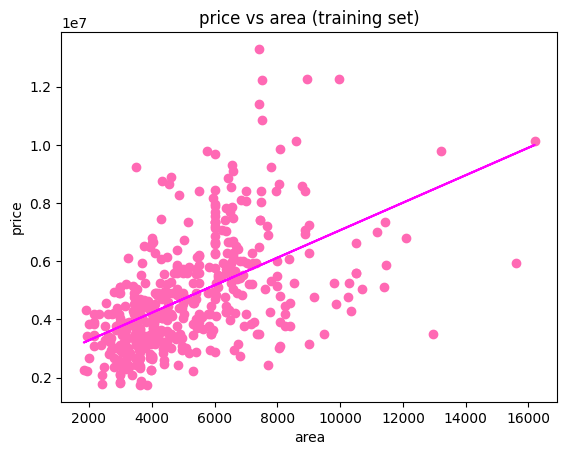

In [169]:
#step5: visualize training set results
import matplotlib.pyplot as plt
#plot the actual data points of training set
plt.scatter(x_train,y_train,color="hotpink")
#plot the regression line
plt.plot(x_train,regressor.predict(x_train),color="magenta")
plt.title("price vs area (training set)")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

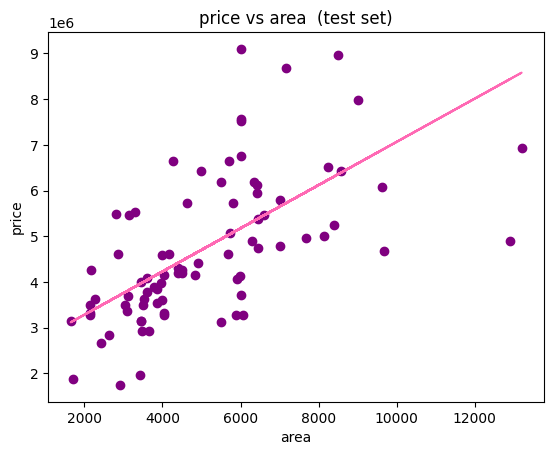

In [170]:
#step 6: visualixe test set sresults 

import matplotlib.pyplot as plt
#plot the actual data points of test set
plt.scatter(x_test,y_test,color="purple")
#plot the regression line for test set
plt.plot(x_test,regressor.predict(x_test),color="hotpink")
plt.title("price vs area  (test set)")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [171]:

#step 7: make new prediction
new_price_pred=regressor.predict([[8000]])
print("the pridicted price for area of 8000 is ",new_price_pred)


the pridicted price for area of 8000 is  [6121977.85996016]


In [172]:
#step 8: intercept and coefficient
print("intercept ...  :",regressor.intercept_)
print("coefficient ...: ",regressor.coef_)

intercept ...  : 2339706.2901356397
coefficient ...:  [472.78394623]


In [173]:
#evaluate results 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae=mean_absolute_error(y_test,y_pred)  #
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
from sklearn.metrics import r2_score 
r2 = r2_score(y_test,y_pred) 


In [174]:
print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"RMSE={rmse}")
print('r2 score for perfect model is', r2) 

MAE=948644.0573663753
MSE=1610835029066.9448
RMSE=1269186.7589393393
r2 score for perfect model is 0.3450038000862079


<h1>using tips dataset<h/1>

In [176]:
df=pd.read_csv("tips.csv")
df2=df[["total_bill","tip"]]

In [177]:
#x and y
x=df2.drop("tip",axis=1)
y=df["tip"]

In [277]:
#step2:split data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.18,random_state=0)

In [269]:
#test 3: fit simple linear regression to training data
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [282]:
#step4: make prediction
y_pred=regressor.predict(x_test)
y_pred

array([2.74720555, 2.81483161, 2.93076199, 1.74827211, 2.61968213,
       1.60335913, 2.77908641, 3.3017392 , 2.80130639, 4.39534912,
       3.49012607, 3.48336346, 2.4071431 , 2.30377185, 2.34434748,
       3.98476236, 1.85454162, 2.4003805 , 2.86216984, 3.27951921,
       3.95191542, 3.06891236, 2.5935978 , 2.50085349, 2.35304226,
       2.63224126, 2.22262058, 3.92679717, 3.49109216, 2.57137781,
       2.47090481, 2.25353535, 2.53756478, 2.070945  , 2.81483161,
       2.34144922, 2.68344384, 2.04582675, 5.71695545, 2.59166562,
       1.87676161, 2.24870492, 2.56364912, 3.9316276 ])

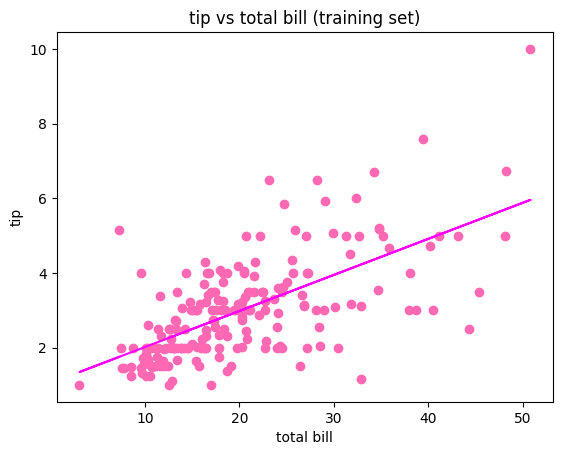

In [283]:
#step5: visualize training set results
import matplotlib.pyplot as plt
#plot the actual data points of training set
plt.scatter(x_train,y_train,color="hotpink")
#plot the regression line
plt.plot(x_train,regressor.predict(x_train),color="magenta")
plt.title("tip vs total bill (training set)")
plt.xlabel("total bill")
plt.ylabel("tip")
plt.show()

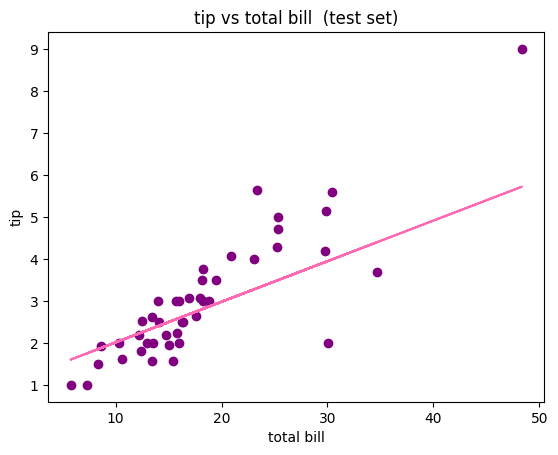

In [272]:
#step 6: visualixe test set sresults 

import matplotlib.pyplot as plt
#plot the actual data points of test set
plt.scatter(x_test,y_test,color="purple")
#plot the regression line for test set
plt.plot(x_test,regressor.predict(x_test),color="hotpink")
plt.title("tip vs total bill  (test set)")
plt.xlabel("total bill")
plt.ylabel("tip")
plt.show()


In [284]:

#step 7: make new prediction
new_price_pred=regressor.predict([[20]])
print("the pridicted tip for 20 $ total bill",new_price_pred)


the pridicted tip for 20 $ total bill [2.9800324]


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [274]:
#step 8: intercept and coefficient
print("intercept ...  :",regressor.intercept_)
print("coefficient ...: ",regressor.coef_)

intercept ...  : 1.0478593976362711
coefficient ...:  [0.09660865]


In [286]:
#evaluate results 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 
import numpy as np
mae=mean_absolute_error(y_test,y_pred)  #
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

r2 = r2_score(y_test,y_pred) 


In [288]:
print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"RMSE={rmse}")
print('r2 score for perfect model is', r2) 

MAE=0.6634139235263166
MSE=0.8563139286018493
RMSE=0.9253723189083675
r2 score for perfect model is 0.6081615517513292


<h1>multiple regression<h/1>

In [290]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
startup_df=pd.read_csv("Startups.csv")


In [292]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [294]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [296]:
shape=startup_df.shape
print("dataset contains {} rows and columns ".format(shape[0],shape[1]))
print(startup_df.columns)
print(startup_df.describe())

dataset contains 50 rows and columns 
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [297]:
x=startup_df[["R&D Spend","Administration","Marketing Spend"]]
y=startup_df["Profit"]
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [300]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [302]:
#predict
y_pred=linreg.predict(x_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [307]:
from sklearn import metrics 
meanAbErr=metrics.mean_absolute_error(y_test,y_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("R squared: {:.2f}".format(linreg.score(x,y)*100))
print("mean absolute error:",meanAbErr)
print("mean Square error:",meanSqErr)
print("root mean square error:",rootMeanSqErr)

R squared: 94.91
mean absolute error: 7320.4416148481305
mean Square error: 77506468.16885428
root mean square error: 8803.775790469354


In [313]:
#get coefficients and intercept from the model 
coef=linreg.coef_
intercept=linreg.intercept_

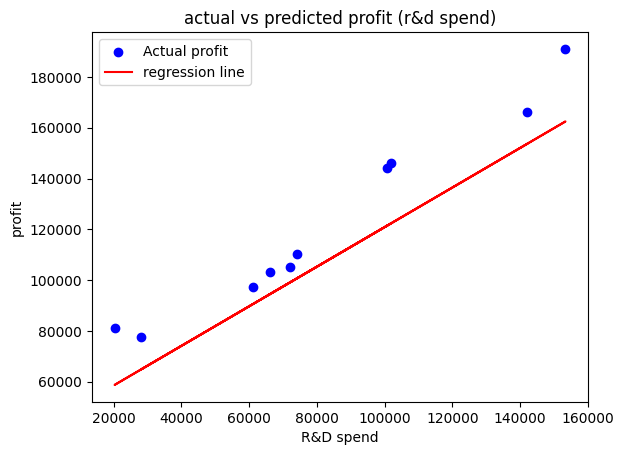

In [314]:
#plot data and regression line
plt.scatter(x_test["R&D Spend"],y_test,color="blue",label="Actual profit")  #plot actual data for R&D spend
plt.plot(x_test["R&D Spend"],coef[0]*x_test["R&D Spend"] +intercept,color="red",label="regression line") #plot regression line based on r&d spend
plt.xlabel("R&D spend")
plt.ylabel("profit")
plt.title("actual vs predicted profit (r&d spend)")
plt.legend()
plt.show()

In [316]:
#predict values
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28,103282.38,103901.896970,-619.516970
11,144259.40,132763.059931,11496.340069
10,146121.95,133567.903700,12554.046300
41,77798.83,72911.789767,4887.040233
2,191050.39,179627.925672,11422.464328
27,105008.31,115166.648648,-10158.338648
38,81229.06,67113.576906,14115.483094
31,97483.56,98154.806868,-671.246868
22,110352.25,114756.115552,-4403.865552
4,166187.94,169064.014088,-2876.074088


<h1>assignment 20:<h/1>

Perform Multiple Linear Regression on the Student_Performance dataset to predict Performance Index. 
Ignore the Extracurricular Activities column in the feature list.


In [317]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [318]:
df=pd.read_csv("Student_Performance.csv")

In [319]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [323]:
shape=df.shape
print("dataset contains {} rows and columns ".format(shape[0],shape[1]))
print(df.columns)
print(df.describe())

dataset contains 10000 rows and columns 
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000     

In [327]:

x=df[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']]
y=df['Performance Index']
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [329]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [330]:
#predict
y_pred=linreg.predict(x_test)
y_pred

array([50.76795411, 53.44421463, 78.59316603, ..., 64.23608723,
       26.21591968, 19.15468409])

In [331]:
from sklearn import metrics 
meanAbErr=metrics.mean_absolute_error(y_test,y_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("R squared: {:.2f}".format(linreg.score(x,y)*100))
print("mean absolute error:",meanAbErr)
print("mean Square error:",meanSqErr)
print("root mean square error:",rootMeanSqErr)

R squared: 98.85
mean absolute error: 1.6185650781179433
mean Square error: 4.129528706087852
root mean square error: 2.032124185695316


In [332]:
#get coefficients and intercept from the model 
coef=linreg.coef_
intercept=linreg.intercept_

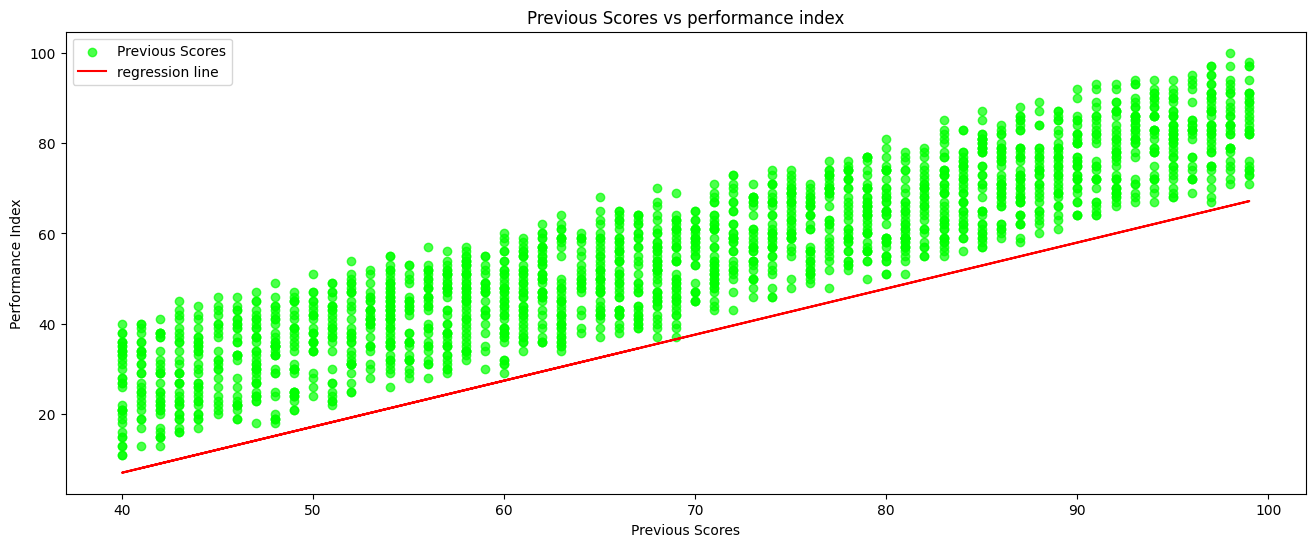

In [345]:
#plot data and regression line
plt.figure(figsize=(16,6))
plt.scatter(x_test['Previous Scores'],y_test,color="lime",label="Previous Scores",alpha=0.7)  #plot actual data for R&D spend
plt.plot(x_test['Previous Scores'],coef[1]*x_test['Previous Scores'] +intercept,color="red",label="regression line") #plot regression line based on r&d spend
plt.xlabel('Previous Scores')
plt.ylabel("Performance Index")
plt.title("Previous Scores vs performance index")
plt.legend()
plt.show()
